[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/nbs/mlp/blob/master/exercise_solution.ipy)

# MLP exercise (solution)

Use your own MLP framework to perform image classification with the MNIST Dataset

## Data

In [1]:
# get the data 

from sklearn.datasets import fetch_openml
import numpy as np

X, y = fetch_openml(
    'mnist_784', 
    version=1, 
    return_X_y=True)

y = y.astype(np.int)

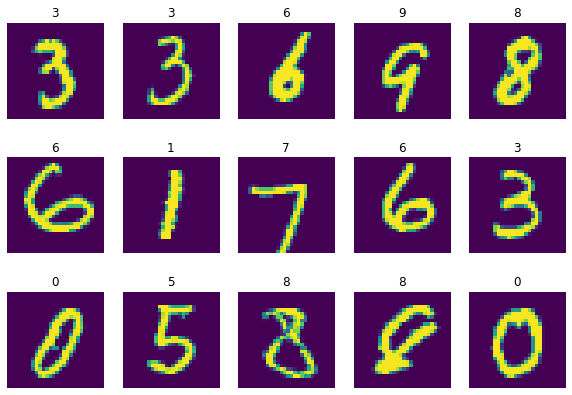

In [2]:
# visualize images

import matplotlib.pyplot as plt
import random

fig, axs = plt.subplots(3,5, figsize=(10,7))
for _ax in axs:
    for ax in _ax:
        ix = random.randint(0, len(X)-1)
        img = X[ix].reshape((28,28))
        ax.imshow(img)
        ax.set_title(y[ix])
        ax.axis('off')

plt.show()

In [3]:
# train-test split

X_train, y_train, X_test, y_test = X[:60000] / 255., y[:60000], X[60000:] / 255., y[60000:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

## Training

In [5]:
# import framework

from mlp import *

In [7]:
# training

D_in, H, D_out = 784, 100, 10

mlp = MLP([
    Linear(D_in, H),
    ReLU(),
    Linear(H, D_out),
])

optimizer = SGD(mlp, lr=0.001)
loss = CrossEntropy(mlp)

max_samples = 1000
epochs = 20
for e in range(1,epochs+1):
  l = []
  # train
  for img, label in zip(X_train[:max_samples], y_train[:max_samples]):
    img = img[None,:]
    y_pred = mlp(img)    
    l.append(loss(y_pred, label))
    loss.backward()    
    optimizer.update()
  # eval
  correct = 0
  for img, label in zip(X_test, y_test):
    img = img[None,:]
    y_pred = mlp(img) 
    correct += np.argmax(y_pred) == label
  print(f'Epoch: {e}, Loss: {np.mean(l):.4f}, Acc: {correct}/{len(X_test)} ({100*correct/len(X_test):.3f}%)')

Epoch: 1, Loss: 1.9875, Acc: 5922/10000 (59.220%)
Epoch: 2, Loss: 1.3320, Acc: 7166/10000 (71.660%)
Epoch: 3, Loss: 0.9665, Acc: 7604/10000 (76.040%)
Epoch: 4, Loss: 0.7734, Acc: 7858/10000 (78.580%)
Epoch: 5, Loss: 0.6568, Acc: 8008/10000 (80.080%)
Epoch: 6, Loss: 0.5780, Acc: 8129/10000 (81.290%)
Epoch: 7, Loss: 0.5200, Acc: 8217/10000 (82.170%)
Epoch: 8, Loss: 0.4752, Acc: 8280/10000 (82.800%)
Epoch: 9, Loss: 0.4393, Acc: 8333/10000 (83.330%)
Epoch: 10, Loss: 0.4097, Acc: 8399/10000 (83.990%)
Epoch: 11, Loss: 0.3847, Acc: 8451/10000 (84.510%)
Epoch: 12, Loss: 0.3631, Acc: 8490/10000 (84.900%)
Epoch: 13, Loss: 0.3441, Acc: 8536/10000 (85.360%)
Epoch: 14, Loss: 0.3272, Acc: 8568/10000 (85.680%)
Epoch: 15, Loss: 0.3119, Acc: 8582/10000 (85.820%)
Epoch: 16, Loss: 0.2980, Acc: 8603/10000 (86.030%)
Epoch: 17, Loss: 0.2853, Acc: 8618/10000 (86.180%)
Epoch: 18, Loss: 0.2735, Acc: 8629/10000 (86.290%)
Epoch: 19, Loss: 0.2626, Acc: 8642/10000 (86.420%)
Epoch: 20, Loss: 0.2523, Acc: 8654/10000

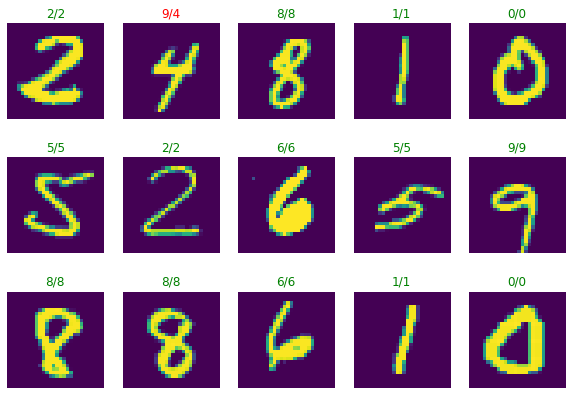

In [9]:
# visualize results

import matplotlib.pyplot as plt
import random

fig, axs = plt.subplots(3,5, figsize=(10,7))
for _ax in axs:
    for ax in _ax:
        ix = random.randint(0, len(X_test)-1)
        img = X_test[ix]
        label = y_test[ix]
        y_pred = np.argmax(mlp(img[None,:]), axis=1)[0]
        ax.imshow(img.reshape((28,28)))
        ax.set_title(f'{y_pred}/{label}', color = "green" if y_pred == label else "red")
        ax.axis('off')

plt.show()